
# 기초

[[  0   0 169 ... 138   0   0]
 [  0   0 169 ... 138   0   0]
 [  0   0 169 ... 138   0   0]
 ...
 [  0   0  53 ... 114   0   0]
 [  0   0  53 ... 122   0   0]
 [  0   0  53 ... 122   0   0]]


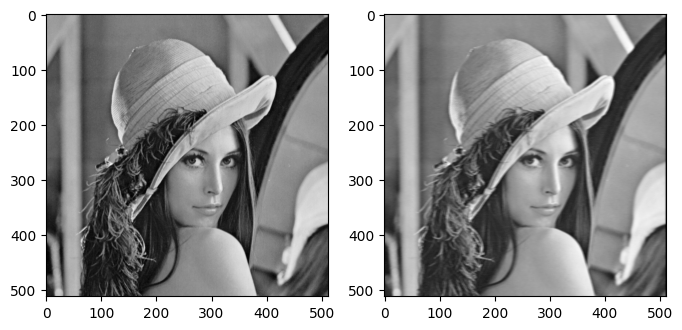

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
from PIL import Image

def apply_filter(img, kernel):
    result = np.zeros(img.shape, dtype=np.float32)
    padded_img = np.pad(img, ((kernel.shape[0]//2,kernel.shape[0]//2), (kernel.shape[1]//2,kernel.shape[1]//2)), mode='constant', constant_values=0)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            result[i,j] = np.sum(region * kernel)
    
    return result

def load_image(dir):
    return cv2.imread(dir, cv2.IMREAD_GRAYSCALE)

def plot_images(imgs, cmap=cm.gray):
    plt.figure(figsize=(4*len(imgs), 4))

    for i in range(len(imgs)):
        plt.subplot(1, len(imgs), 1+i)
        plt.imshow(np.clip(imgs[i], 0, 255).astype(np.uint8), cmap=cmap)
    
    plt.show();

if __name__ == "__main__":
    image_path = './Input/Image/Lenna.png'
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    low_pass_kernel = np.array([[0.2,0.2,0.2,0.2,0.2]])
    horizontal_sobel_kernel = np.array([[-1,0,1],
                                        [-2,0,2],
                                        [-1,0,1]])
    low_pass_filtered_img = apply_filter(img, low_pass_kernel)
    imgs = [img, low_pass_filtered_img]
    plot_images(imgs)

    